# (Data Visualization Ford Go Bike 2017)

## by (Abdullah Al-Abdullatif)

## Investigation Overview

I chose the Ford GoBike dataset in order to investigate bike rentals by different people. There are a lot of different variables and our main focus is on identifying the most common variables that affect bike rental.

## Dataset Overview

There are many variables in the data within 10 different variables representing different data. The data also contains approximately 3.3 billion records. This document explores general Ford GoBike cycling trip data that includes the year 2017. Features included the start / end time of the trip, plus additional metrics such as user type, gender and age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('2017-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
# drop unnecessary columns in the clean DataFrame
df_bike.drop(['start_station_id','start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [4]:
# make useful of the start time and added the month and day of week to make it useful in analysis
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

df_bike['hour_of_day'] = df_bike.start_time.dt.strftime('%H')
df_bike['month'] = df_bike['start_time'].apply(lambda x: x.strftime('%B').lower())
df_bike['day_of_week'] = df_bike['start_time'].apply(lambda x: x.strftime('%A').lower())

In [5]:
# order the days.
day_order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
# create categorical variable.
df_bike['day_of_week'] = pd.Categorical(df_bike['day_of_week'], categories= day_order, ordered = True)

In [6]:
df_bike['duration_min']= df_bike['duration_sec'] / 60


## (The most period and days that users use bike)

We note that on Saturday and Sunday people use longer bicycles than on the rest of the week. Which we noticed that is a weekend in most of the countries in the world. Suppose they are busy during their shift hours during workdays, and we noticed an increase in the duration of use at the end of the weekends.

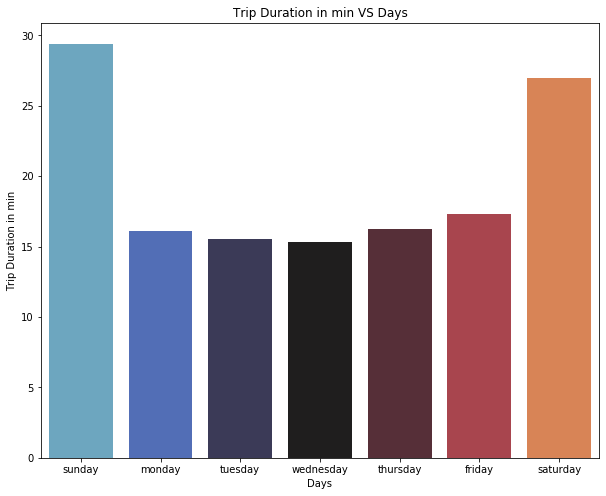

In [7]:
# find the relationship between trip duration and days
plt.figure(figsize = [10,8])
ax = sb.barplot(data=df_bike,x='day_of_week',y='duration_min', color=sb.color_palette()[0], palette="icefire", ci=None)
plt.xlabel('Days')
plt.ylabel('Trip Duration in min')
plt.title('Trip Duration in min VS Days');
plt.xticks(rotation = 0);

## (The most month that users ride bike)

We can see in the graph that on July and august people use the bike more than the rest of the months. Which means that users use the bike in the summer season more than rest of months.

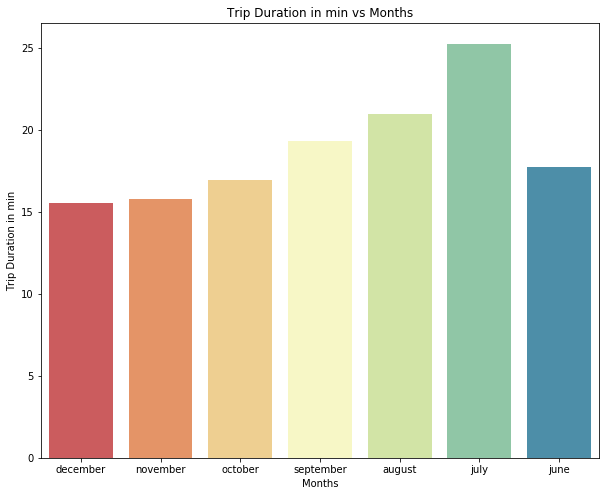

In [8]:
# the relationship between trip duration and months
plt.figure(figsize = [10,8])
ax = sb.barplot(data=df_bike, x='month', y='duration_min', color=sb.color_palette()[0], palette='Spectral', ci=None)
plt.xlabel('Months')
plt.ylabel('Trip Duration in min')
plt.title('Trip Duration in min vs Months');
plt.xticks(rotation =0);

## (Who most ride a bike customers or subscriber and which days?)

We notice through the graphic illustration, that the customer and subscriber are using bikes much more on Saturday and Sunday Which we noticed that is a weekend in most of the countries in the world.


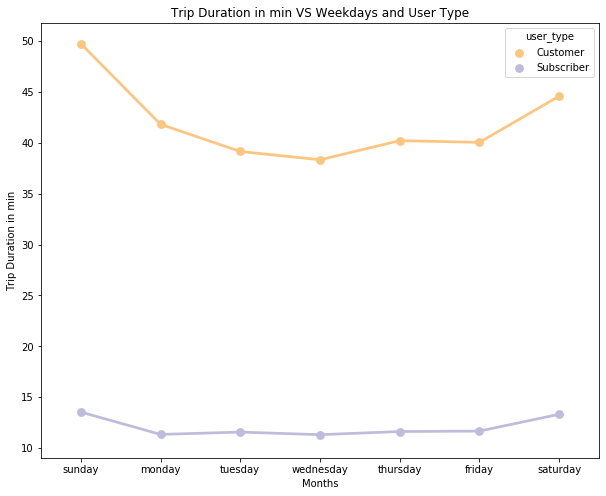

In [9]:
plt.figure(figsize = [10,8]);
ax = sb.pointplot(data=df_bike,x='day_of_week',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='PuOr', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration in min');
plt.title('Trip Duration in min VS Weekdays and User Type');
plt.xticks(rotation = 0);

In [15]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

/bin/sh: jupyter: command not found
